In [1]:
from scipy.stats import bootstrap
from scipy.stats import ttest_rel
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'text.usetex':False, 'font.family':'sans-serif','figure.facecolor':"white",'axes.facecolor':"white"})

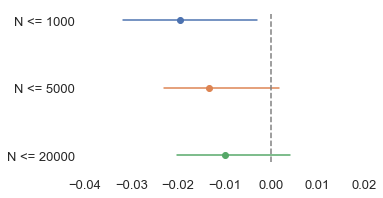

SE: t and p values:
N <= 1000: Ttest_relResult(statistic=-3.80441672080581, pvalue=0.002509571702569921)
N <= 5000: Ttest_relResult(statistic=-3.1261798111959695, pvalue=0.004101521630126034)
N <= 20000: Ttest_relResult(statistic=-2.349827483391924, pvalue=0.024384243846757404)


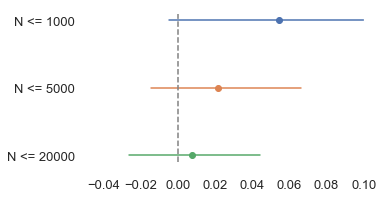

NP1: t and p values:
N <= 1000: Ttest_relResult(statistic=2.2778934714993766, pvalue=0.04183722384322134)
N <= 5000: Ttest_relResult(statistic=1.5410395118023195, pvalue=0.13453400996441517)
N <= 20000: Ttest_relResult(statistic=0.5866350091436102, pvalue=0.5611097674441269)


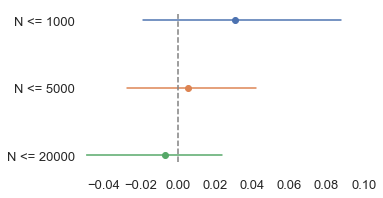

NP2: t and p values:
N <= 1000: Ttest_relResult(statistic=1.5323776357293761, pvalue=0.15135914045765048)
N <= 5000: Ttest_relResult(statistic=0.4574829412913997, pvalue=0.6508540901117383)
N <= 20000: Ttest_relResult(statistic=-0.5289209786657074, pvalue=0.6001065415439439)


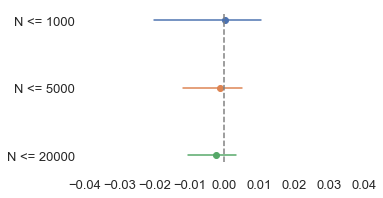

EC: t and p values:
N <= 1000: Ttest_relResult(statistic=0.014905187821232794, pvalue=0.9883527692732184)
N <= 5000: Ttest_relResult(statistic=-0.46864449459859875, pvalue=0.6429519550515208)
N <= 20000: Ttest_relResult(statistic=-1.011214930684995, pvalue=0.3186621805410189)


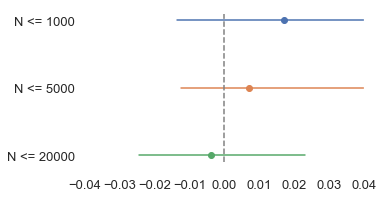

MA: t and p values:
N <= 1000: Ttest_relResult(statistic=1.4277818921032832, pvalue=0.17885840258837027)
N <= 5000: Ttest_relResult(statistic=0.8157942656295978, pvalue=0.4215038082810456)
N <= 20000: Ttest_relResult(statistic=-0.4587275542980982, pvalue=0.6491874199464253)


In [2]:
metrics = ["SE","NP1","NP2","EC","MA"]
idx_s = 13 ## nodes <= 1000
idx_m = 29 ## nodes <= 5000
idx_a = 37 ## nodes <= 20000 index_can_be_processed_by_FR

xlim_l = [-0.04,-0.05,-0.05,-0.04,-0.04]
xlim_r = [0.02,0.10,0.10,0.04,0.04]
cnt = 0
for m in metrics:
    df_rd = pd.read_csv("./results/RD_" + m +".csv",index_col=0)[:idx_a]
    CI = 0.996
    diff_df = (df_rd["FR-RVS"] - df_rd["FR"])
    plt.figure(figsize=(5,3))
    data_small = diff_df[:idx_s]
    data_small = data_small[~np.isnan(data_small)]
    data_small = (data_small,)  
    res = bootstrap(data_small, np.mean, confidence_level=CI,
                    random_state=42)
    p = plt.plot([res.confidence_interval.low,res.confidence_interval.high],[3,3])
    plt.plot([data_small[0].mean()],[3],marker='o',c=p[0].get_color())

    data_mid = diff_df[:idx_m]
    data_mid = data_mid[~np.isnan(data_mid)]
    data_mid = (data_mid,)  
    res = bootstrap(data_mid, np.mean, confidence_level=CI,
                    random_state=42)
    p = plt.plot([res.confidence_interval.low,res.confidence_interval.high],[2,2])
    plt.plot([data_mid[0].mean()],[2],marker='o',c=p[0].get_color())


    data_all = diff_df[:idx_a]
    data_all = data_all[~np.isnan(data_all)]
    data_all = (data_all,)  
    res = bootstrap(data_all, np.mean, confidence_level=CI,
                    random_state=42)
    p = plt.plot([res.confidence_interval.low,res.confidence_interval.high],[1,1])
    plt.plot([data_all[0].mean()],[1],marker='o',c=p[0].get_color())

    plt.plot([0,0],[0.9,3.1],c="grey",ls="--")
    plt.xlim(xlim_l[cnt],xlim_r[cnt])
    cnt += 1
    plt.yticks([3,2,1],["N <= 1000","N <= 5000", "N <= 20000"],fontsize=13)
    plt.xticks(fontsize=13)
    plt.savefig("./Figs/SuppFigs10-11BootstrapRVS/RD_"+ m +"_stats.svg")
    plt.show()
    print(m + ": t and p values:")
    print("N <= 1000:" , ttest_rel(df_rd["FR-RVS"][:idx_s],df_rd["FR"][:idx_s]))
    print("N <= 5000:" , ttest_rel(df_rd["FR-RVS"][:idx_m],df_rd["FR"][:idx_m]))
    print("N <= 20000:" , ttest_rel(df_rd["FR-RVS"][:idx_a],df_rd["FR"][:idx_a]))

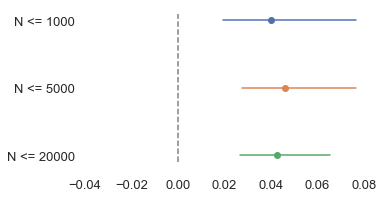

SE: t and p values:
N <= 1000: Ttest_relResult(statistic=3.93286557188428, pvalue=0.0019883565087207428)
N <= 5000: Ttest_relResult(statistic=5.519765330680748, pvalue=6.713236694804365e-06)
N <= 20000: Ttest_relResult(statistic=6.2614104626385485, pvalue=3.113494608546742e-07)


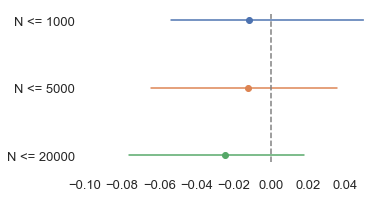

NP1: t and p values:
N <= 1000: Ttest_relResult(statistic=-0.48831406313072995, pvalue=0.6341286616017893)
N <= 5000: Ttest_relResult(statistic=-0.6913611544922501, pvalue=0.49503141417985197)
N <= 20000: Ttest_relResult(statistic=-1.4615070881874155, pvalue=0.15255092041039509)


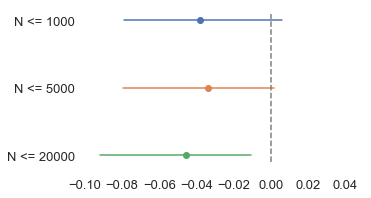

NP2: t and p values:
N <= 1000: Ttest_relResult(statistic=-2.443074873937299, pvalue=0.03098314942717875)
N <= 5000: Ttest_relResult(statistic=-2.331936176786759, pvalue=0.02712260657242044)
N <= 20000: Ttest_relResult(statistic=-3.2114546650544926, pvalue=0.0027800948227797747)


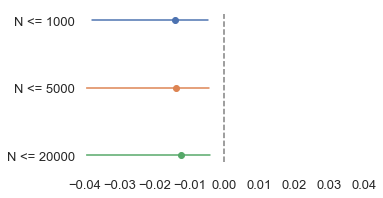

EC: t and p values:
N <= 1000: Ttest_relResult(statistic=-2.7431527287762134, pvalue=0.01782695594174865)
N <= 5000: Ttest_relResult(statistic=-2.239025841120056, pvalue=0.033281505715791276)
N <= 20000: Ttest_relResult(statistic=-2.479923026926951, pvalue=0.017955198645990152)


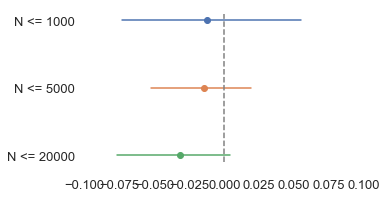

MA: t and p values:
N <= 1000: Ttest_relResult(statistic=-0.5712120408223008, pvalue=0.5783973037850658)
N <= 5000: Ttest_relResult(statistic=-1.1493126763078434, pvalue=0.2601501132017971)
N <= 20000: Ttest_relResult(statistic=-2.247598462834879, pvalue=0.030822858780257933)


In [3]:
metrics = ["SE","NP1","NP2","EC","MA"]
idx_s = 13 ## nodes <= 1000
idx_m = 29 ## nodes <= 5000
idx_a = 37 ## nodes <= 20000 index_can_be_processed_by_FR

xlim_l = [-0.04,-0.10,-0.10,-0.04,-0.10]
xlim_r = [0.08,0.05,0.05,0.04,0.10]
cnt = 0
for m in metrics:
    df_pmds = pd.read_csv("./results/" + m +".csv",index_col=0)[["FR","FR-RVS","Linlog","FA2","Maxent","SM","tsNET","t-FDP"]][:idx_a]
    CI = 0.996
    diff_df = (df_pmds["FR-RVS"] - df_pmds["FR"])
    plt.figure(figsize=(5,3))
    data_small = diff_df[:idx_s]
    data_small = data_small[~np.isnan(data_small)]
    data_small = (data_small,)  
    res = bootstrap(data_small, np.mean, confidence_level=CI,
                    random_state=42)
    p = plt.plot([res.confidence_interval.low,res.confidence_interval.high],[3,3])
    plt.plot([data_small[0].mean()],[3],marker='o',c=p[0].get_color())

    data_mid = diff_df[:idx_m]
    data_mid = data_mid[~np.isnan(data_mid)]
    data_mid = (data_mid,)  
    res = bootstrap(data_mid, np.mean, confidence_level=CI,
                    random_state=42)
    p = plt.plot([res.confidence_interval.low,res.confidence_interval.high],[2,2])
    plt.plot([data_mid[0].mean()],[2],marker='o',c=p[0].get_color())


    data_all = diff_df[:idx_a]
    data_all = data_all[~np.isnan(data_all)]
    data_all = (data_all,)  
    res = bootstrap(data_all, np.mean, confidence_level=CI,
                    random_state=42)
    p = plt.plot([res.confidence_interval.low,res.confidence_interval.high],[1,1])
    plt.plot([data_all[0].mean()],[1],marker='o',c=p[0].get_color())

    plt.plot([0,0],[0.9,3.1],c="grey",ls="--")
    plt.xlim(xlim_l[cnt],xlim_r[cnt])
    cnt += 1
    plt.yticks([3,2,1],["N <= 1000","N <= 5000", "N <= 20000"],fontsize=13)
    plt.xticks(fontsize=13)
    plt.savefig("./Figs/SuppFigs10-11BootstrapRVS/PMDS_"+ m +"_stats.svg")
    plt.show()
    print(m + ": t and p values:")
    print("N <= 1000:" , ttest_rel(df_pmds["FR-RVS"][:idx_s],df_pmds["FR"][:idx_s]))
    print("N <= 5000:" , ttest_rel(df_pmds["FR-RVS"][:idx_m],df_pmds["FR"][:idx_m]))
    print("N <= 20000:" , ttest_rel(df_pmds["FR-RVS"][:idx_a],df_pmds["FR"][:idx_a]))